In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167])
Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,4.68])
n1 = X.shape[0]
n2 = Y.shape[0]

SUM_x = 0
SUM_y = 0


In [3]:
for x in X:
    SUM_x = tf.add(x,SUM_x)


    
for y in Y:
    SUM_y = tf.add(x,SUM_y)
    
with tf.Session() as sess:
    mean_x = sess.run(SUM_x/n1)
    mean_y = sess.run(SUM_y/n2)
    print(mean_x)
    print(mean_y)
    
    


5.6726
2.167


In [6]:
#variance of x

var = 0
for x in X:
    a = tf.subtract(x,mean_x)
    a2 = tf.multiply(a,a)
    var = tf.add(a2,var)
    
with tf.Session() as sess:
    var_x = sess.run(var/n1)
    print(var_x)

4.52872704


In [10]:
#Covariance of x and y covariance=sum((x(i)−mean(x))∗(y(i)−mean(y)))

covar = 0
for (i,j) in zip(X,Y):
    x = tf.subtract(i,mean_x)
    y = tf.subtract(j,mean_y)
    xy = tf.multiply(x,y)
    covar = tf.add(xy,covar)

with tf.Session() as sess:
    covar_xy = sess.run(covar)
    print(covar_xy)



-1.2445654


In [18]:
#value of m

m = covar_xy/var_x
#with tf.Session() as sess:
   # m = sess.run(m)
print(m)


-0.274815723935


In [19]:
#value of c

a = tf.multiply(m,mean_x)
c = tf.subtract(mean_y,a)
with tf.Session() as sess:
    c = sess.run(c)
    print(c)

3.72591967559


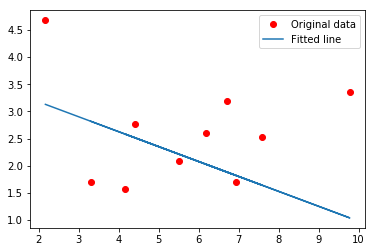

In [23]:
#Graphical display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, m * X + c, label='Fitted line')
plt.legend()
plt.show()

In [25]:
# Constructing a linear model
pred = tf.add(tf.multiply(X, m), c)
# Root Mean squared error
err = tf.sqrt(tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n1))

with tf.Session() as sess:
    error = sess.run(err)
    print(error)

0.806335852207


In [26]:
print("Error found by Root mean squared error :",error)

Error found by Root mean squared error : 0.806335852207
